# Methetmetical Symbol Training & Recognition 

In [6]:
# Imports

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2025-03-25 22:40:15.868170: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
def load_data(folder_paths):
    images = []
    labels = []
    for class_label, folder_path in enumerate(folder_paths):
        for file_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
            image = cv2.resize(image, (28, 28))  # Ensure the image is 28x28 pixels
            images.append(image)
            labels.append(class_label)  # Assign class label
    return np.array(images), np.array(labels)

# Define paths to folders containing images for each symbol
addition_folder ="../Handwritten_Digits_Recognition/data_Symbol/addition"
subtraction_folder = "../Handwritten_Digits_Recognition/data_Symbol/subtraction"
multiplication_folder = "../Handwritten_Digits_Recognition/data_Symbol/multiplication"
division_folder = "../Handwritten_Digits_Recognition/data_Symbol/division"

# Load data from all folders
train_data, train_labels = load_data([addition_folder, subtraction_folder, multiplication_folder, division_folder])

In [9]:
# Normalize pixel values to [0, 1]
train_data = train_data.astype('float32') / 255.0

In [10]:
# Add channel dimension (shape becomes (num_samples, 28, 28, 1))
train_data = np.expand_dims(train_data, axis=-1) 

In [12]:
print (train_data.shape)

(87880, 28, 28, 1)


In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Adjust input shape for grayscale images
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # Only 4 output classes for the symbols
])

In [18]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Train the model

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test)) 


Epoch 1/10
2197/2197 [==============================] - 26s 11ms/step - loss: 0.3430 - accuracy: 0.2127 - val_loss: 0.2377 - val_accuracy: 0.2264
Epoch 2/10
2197/2197 [==============================] - 24s 11ms/step - loss: 0.1982 - accuracy: 0.2348 - val_loss: 0.1881 - val_accuracy: 0.2107
Epoch 3/10
2197/2197 [==============================] - 24s 11ms/step - loss: 0.1679 - accuracy: 0.2369 - val_loss: 0.1644 - val_accuracy: 0.2352
Epoch 4/10
2197/2197 [==============================] - 23s 11ms/step - loss: 0.1456 - accuracy: 0.2392 - val_loss: 0.1592 - val_accuracy: 0.2460
Epoch 5/10
2197/2197 [==============================] - 25s 11ms/step - loss: 0.1269 - accuracy: 0.2410 - val_loss: 0.1399 - val_accuracy: 0.2249
Epoch 6/10
2197/2197 [==============================] - 25s 12ms/step - loss: 0.1121 - accuracy: 0.2428 - val_loss: 0.1074 - val_accuracy: 0.2363
Epoch 7/10
2197/2197 [==============================] - 24s 11ms/step - loss: 0.0999 - accuracy: 0.2441 - val_loss: 0.1327 -

In [21]:
# Assuming symbol_model is your trained model
model.save('symbol_model.h5')  # Save as .h5 file

In [28]:
# Evaluate the model
loss, accuracy = model.evaluate(x_train, y_train)
print(f"Loss: {loss}, Accuracy: {accuracy}")

2197/2197 [==============================] - 7s 3ms/step - loss: 0.0668 - accuracy: 0.2513
Loss: 0.06676582992076874, Accuracy: 0.2513085901737213


In [24]:
# Define a mapping from the class index to the corresponding symbol
class_names = ['+', '-', '*', '/']

In [25]:
# Function to load and preprocess a single image
def load_and_preprocess_image(image_path):
    # Load the input image as a grayscale image
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image is loaded successfully
    if img_gray is None:
        print(f"Error: Failed to load the input image at {image_path}")
        return None

    # Resize the image to 28x28 pixels
    img_resized = cv2.resize(img_gray, (28, 28))

    # Normalize pixel values to [0, 1]
    img_normalized = img_resized.astype('float32') / 255.0

    # Add channel dimension (needed by the model)
    img_normalized = np.expand_dims(img_normalized, axis=-1)

    # Add batch dimension
    img_batch = np.expand_dims(img_normalized, axis=0)

    return img_batch


In [26]:
# Function to predict the symbol from an image
def predict_image(image_path, model):
    img_batch = load_and_preprocess_image(image_path)

    if img_batch is None:
        return None, None
    
    # Make prediction
    prediction = model.predict(img_batch)
    predicted_class = np.argmax(prediction)

    return predicted_class, prediction


In [27]:
image_path = "./MS Paint _ Microsoft Paint Online (1).png" 
predicted_class, prediction = predict_image(image_path, model)


Error: Failed to load the input image at ./MS Paint _ Microsoft Paint Online (1).png


[ WARN:0@1414.176] global loadsave.cpp:268 findDecoder imread_('./MS Paint _ Microsoft Paint Online (1).png'): can't open/read file: check file path/integrity


Prediction Result: [[8.6865741e-09 7.6238232e-20 1.0000000e+00 8.7961764e-21]]
Predicted Class Index: 2
Predicted Symbol: *


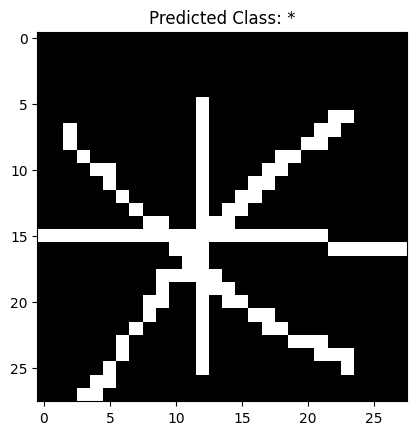

In [144]:
if predicted_class is not None:
    print("Prediction Result:", prediction)
    print("Predicted Class Index:", predicted_class)
    print("Predicted Symbol:", class_names[predicted_class])

    # Display the image and predicted class
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title(f"Predicted Class: {class_names[predicted_class]}")
    plt.show()
else:
    print("Failed to predict the image.")
